In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import files
files.upload()

'from google.colab import files\nfiles.upload()'

In [3]:
import pandas as pd
pd.set_option("display.max_columns", 100)
import numpy as np


import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import ExtraTreeRegressor, DecisionTreeClassifier

import warnings # Uyarilari gozardi etmek için
warnings.filterwarnings("ignore")

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
g = GaussianNB() 
b = BernoulliNB()
k = KNeighborsClassifier()
gbc = GradientBoostingClassifier()
log = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()

In [5]:
algorithms = [g, b, k, log, gbc, r, d]
names = ["GaussianNB", "BernoulliNB", "K Nearest", "Logistic", "GradientBoosting", "RandomForest", "DesicionTree"]

In [6]:
def algo_test(X, y, algorithms = algorithms, names = names):
    for i in range(len(algorithms)):
        algorithms[i] = algorithms[i].fit(X, y)
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for i in range(len(algorithms)):
        accuracy.append(accuracy_score(y, algorithms[i].predict(X)))
        precision.append(precision_score(y, algorithms[i].predict(X)))
        recall.append(recall_score(y, algorithms[i].predict(X)))
        f1.append(f1_score(y, algorithms[i].predict(X)))
    metrics = pd.DataFrame(columns = ["Accuracy", "Precision", "Recall", "F1"], index = names)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision
    metrics["Recall"] = recall
    metrics["F1"] = f1
    return metrics.sort_values("F1", ascending = False)

In [7]:
df=pd.read_csv("failure.csv")

### **EDA**

In [8]:
df

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [10]:
df.isnull().sum() # No empty columns

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [11]:
abs(df.corr()["failure"]).sort_values(ascending=False)

failure       1.000000
attribute8    0.119055
attribute7    0.119055
attribute4    0.067398
attribute2    0.052902
attribute5    0.002270
attribute1    0.001984
attribute9    0.001622
attribute3    0.000948
attribute6    0.000550
Name: failure, dtype: float64

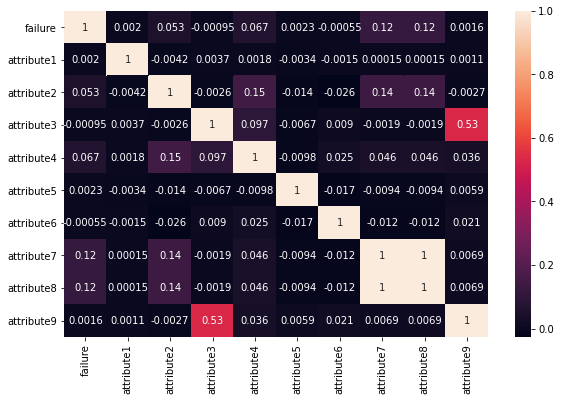

In [12]:
plt.figure(figsize=(9.5,6))
sns.heatmap(df.corr(),annot=True); # attribure7 and attribute8 are same

# DATA PREPAIRING AND FUTURE ENGINEERING

### attribute7 and attribute8 are same things we are gonna drop attribute8

In [13]:
df[df.attribute7==df.attribute8].index 

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            124484, 124485, 124486, 124487, 124488, 124489, 124490, 124491,
            124492, 124493],
           dtype='int64', length=124494)

In [14]:
df.drop("attribute8",axis=1,inplace=True)

In [15]:
df.device.nunique() #1168 unique devices in 124493 rows   #TOTAL DEVICE

1168

In [16]:
df[df.failure==1].device.nunique()

106

In [17]:
df[df.failure==0].device.nunique()

1168

In [18]:
df["date"]=pd.to_datetime(df["date"])
df["month"]=(df.date).dt.month

### **Date could be important**
**Impact of seasonality** 

In [19]:
df.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

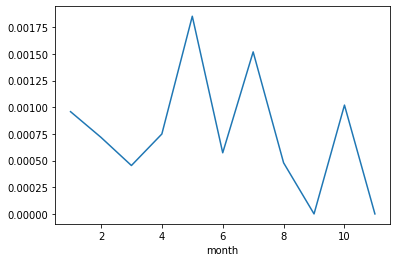

In [20]:
df.groupby("month")["failure"].mean().plot()

In [21]:
df.groupby("month")["failure"].value_counts()

month  failure
1      0          25008
       1             24
2      0          19486
       1             14
3      0          19824
       1              9
4      0          12003
       1              9
5      0          11309
       1             21
6      0          10463
       1              6
7      0          10515
       1             16
8      0           8342
       1              4
9      0           4470
10     0           2937
       1              3
11     0             31
Name: failure, dtype: int64

**ADD SEASON COLUMN**

In [22]:
df.loc[df["month"]<12,"season"]="autumn"
df.loc[df["month"]<9,"season"] = "summer"
df.loc[df["month"]<6,"season"] = "spring"
df.loc[df["month"]<3,"season"] = "winter"

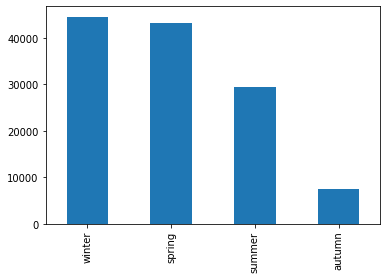

In [23]:
df.season.value_counts().plot(kind="bar")

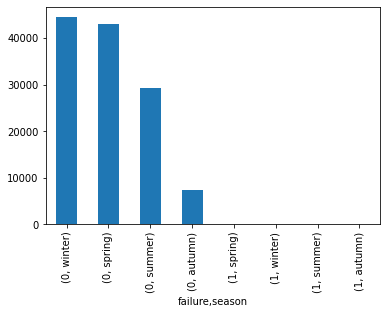

In [24]:
df.groupby("failure")["season"].value_counts().plot(kind="bar") # There is but so little

In [25]:
non_failure=df[df.failure==1].device.unique()

In [26]:
df[df.device.isin(non_failure)].device.nunique()

106

In [27]:
df[-df.device.isin(non_failure)].device.nunique()

1062

In [28]:
df.device.nunique()

1168

In [29]:
df.groupby(["device"])["date"].max()

device
S1F01085   2015-01-06
S1F013BB   2015-05-11
S1F0166B   2015-01-06
S1F01E6Y   2015-02-17
S1F01JE0   2015-01-06
              ...    
Z1F1VMZB   2015-10-19
Z1F1VQFY   2015-06-30
Z1F26YZB   2015-03-25
Z1F282ZV   2015-03-25
Z1F2PBHX   2015-04-06
Name: date, Length: 1168, dtype: datetime64[ns]

In [30]:
df.groupby(["device"])["failure"].max()

device
S1F01085    0
S1F013BB    0
S1F0166B    0
S1F01E6Y    0
S1F01JE0    0
           ..
Z1F1VMZB    0
Z1F1VQFY    1
Z1F26YZB    0
Z1F282ZV    0
Z1F2PBHX    0
Name: failure, Length: 1168, dtype: int64

**WHY MAX VALUE**

device
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: date, dtype: object

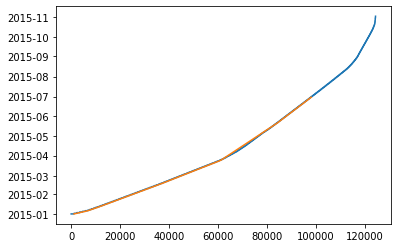

In [31]:
df.groupby(df.device=="Z1F1VQFY")["date"].plot() # a devide save processing #WHY MAX VALUE

In [32]:
new_df=pd.DataFrame()

In [33]:
new_df["process_time"]=df.groupby("device")["date"].max()-df.groupby("device")["date"].min()
new_df["process_time"]=new_df["process_time"].dt.days
new_df["process_time"]

device
S1F01085      5
S1F013BB      5
S1F0166B      5
S1F01E6Y     47
S1F01JE0      5
           ... 
Z1F1VMZB    291
Z1F1VQFY    180
Z1F26YZB     83
Z1F282ZV     83
Z1F2PBHX     95
Name: process_time, Length: 1168, dtype: int64

In [34]:
new_df["total_mileage"]=df.groupby("device")["attribute6"].max()-df.groupby("device")["attribute6"].min()
new_df["total_mileage"]

device
S1F01085     1966
S1F013BB      209
S1F0166B     1612
S1F01E6Y    22097
S1F01JE0     1965
            ...  
Z1F1VMZB    77016
Z1F1VQFY    41296
Z1F26YZB    20406
Z1F282ZV    21311
Z1F2PBHX    16012
Name: total_mileage, Length: 1168, dtype: int64

In [35]:
new_df["att1"]=df.groupby("device")["attribute1"].max()/8

In [36]:
new_df["att2"]=df.groupby("device")["attribute2"].max()/2

In [37]:
new_df["att3v9"]=df.groupby("device")["attribute3"].max()

In [38]:
new_df["att4"]=df.groupby("device")["attribute4"].max()

In [39]:
new_df["att5"]=df.groupby("device")["attribute5"].max()

In [40]:
new_df["att7"]=df.groupby("device")["attribute7"].max()

In [41]:
new_df["failure"]=df.groupby("device")["failure"].max()

In [42]:
new_df["month"]=df.groupby("device")["month"].max()

In [43]:
new_df.loc[new_df["month"]<12,"season"]="autumn"
new_df.loc[new_df["month"]<9,"season"] = "summer"
new_df.loc[new_df["month"]<6,"season"] = "spring"
new_df.loc[new_df["month"]<3,"season"] = "winter"

In [44]:
new_df

,process_time,total_mileage,att1,att2,att3v9,att4,att5,att7,failure,month,season
device,,,,,,,,,,,
S1F01085,5,1966,26953834.0,28.0,0,52,6,0,0,1,winter
S1F013BB,5,209,30418260.0,0.0,0,0,5,0,0,5,spring
S1F0166B,5,1612,28042412.0,0.0,3,0,6,0,0,1,winter
S1F01E6Y,47,22097,30032246.0,0.0,0,0,12,0,0,2,winter
S1F01JE0,5,1965,29445357.0,0.0,0,0,6,0,0,1,winter
...,...,...,...,...,...,...,...,...,...,...,...
Z1F1VMZB,291,77016,30295174.0,0.0,0,0,5,0,0,10,autumn
Z1F1VQFY,180,41296,30383980.0,0.0,0,0,7,0,1,6,summer
Z1F26YZB,83,20406,30242296.0,0.0,1,0,1,0,0,3,spring


In [45]:
liste=list()

for i in df.groupby("device")["device"]:
  liste.append(i[0][0:3])

new_df["device_type"]=liste
new_df["device_type"]

device
S1F01085    S1F
S1F013BB    S1F
S1F0166B    S1F
S1F01E6Y    S1F
S1F01JE0    S1F
           ... 
Z1F1VMZB    Z1F
Z1F1VQFY    Z1F
Z1F26YZB    Z1F
Z1F282ZV    Z1F
Z1F2PBHX    Z1F
Name: device_type, Length: 1168, dtype: object

In [46]:
new_df

,process_time,total_mileage,att1,att2,att3v9,att4,att5,att7,failure,month,season,device_type
device,,,,,,,,,,,,
S1F01085,5,1966,26953834.0,28.0,0,52,6,0,0,1,winter,S1F
S1F013BB,5,209,30418260.0,0.0,0,0,5,0,0,5,spring,S1F
S1F0166B,5,1612,28042412.0,0.0,3,0,6,0,0,1,winter,S1F
S1F01E6Y,47,22097,30032246.0,0.0,0,0,12,0,0,2,winter,S1F
S1F01JE0,5,1965,29445357.0,0.0,0,0,6,0,0,1,winter,S1F
...,...,...,...,...,...,...,...,...,...,...,...,...
Z1F1VMZB,291,77016,30295174.0,0.0,0,0,5,0,0,10,autumn,Z1F
Z1F1VQFY,180,41296,30383980.0,0.0,0,0,7,0,1,6,summer,Z1F
Z1F26YZB,83,20406,30242296.0,0.0,1,0,1,0,0,3,spring,Z1F


In [47]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, S1F01085 to Z1F2PBHX
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   process_time   1168 non-null   int64  
 1   total_mileage  1168 non-null   int64  
 2   att1           1168 non-null   float64
 3   att2           1168 non-null   float64
 4   att3v9         1168 non-null   int64  
 5   att4           1168 non-null   int64  
 6   att5           1168 non-null   int64  
 7   att7           1168 non-null   int64  
 8   failure        1168 non-null   int64  
 9   month          1168 non-null   int64  
 10  season         1168 non-null   object 
 11  device_type    1168 non-null   object 
dtypes: float64(2), int64(8), object(2)
memory usage: 158.6+ KB


In [48]:
new_df["att2"]=new_df["att2"].astype("category")
new_df["att3v9"]=new_df["att3v9"].astype("category")
new_df["att4"]=new_df["att4"].astype("category")
new_df["att5"]=new_df["att5"].astype("category")
new_df["att7"]=new_df["att7"].astype("category")
new_df["month"]=new_df["month"].astype("category")
new_df["season"]=new_df["season"].astype("category")
new_df["device_type"]=new_df["device_type"].astype("category")

In [49]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, S1F01085 to Z1F2PBHX
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   process_time   1168 non-null   int64   
 1   total_mileage  1168 non-null   int64   
 2   att1           1168 non-null   float64 
 3   att2           1168 non-null   category
 4   att3v9         1168 non-null   category
 5   att4           1168 non-null   category
 6   att5           1168 non-null   category
 7   att7           1168 non-null   category
 8   failure        1168 non-null   int64   
 9   month          1168 non-null   category
 10  season         1168 non-null   category
 11  device_type    1168 non-null   category
dtypes: category(8), float64(1), int64(3)
memory usage: 109.7+ KB


### **SCALER DATA**

In [50]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler

In [51]:
scaler=StandardScaler()

In [52]:
new_df[["process_time","total_mileage","att1"]]=scaler.fit_transform(new_df[["process_time","total_mileage","att1"]])

In [53]:
new_df

,process_time,total_mileage,att1,att2,att3v9,att4,att5,att7,failure,month,season,device_type
device,,,,,,,,,,,,
S1F01085,-1.025220,-0.804348,-0.442297,28.0,0,52,6,0,0,1,winter,S1F
S1F013BB,-1.025220,-0.852462,0.505001,0.0,0,0,5,0,0,5,spring,S1F
S1F0166B,-1.025220,-0.814042,-0.144641,0.0,3,0,6,0,0,1,winter,S1F
S1F01E6Y,-0.621165,-0.253074,0.399451,0.0,0,0,12,0,0,2,winter,S1F
S1F01JE0,-1.025220,-0.804375,0.238975,0.0,0,0,6,0,0,1,winter,S1F
...,...,...,...,...,...,...,...,...,...,...,...,...
Z1F1VMZB,1.726206,1.250844,0.471345,0.0,0,0,5,0,0,10,autumn,Z1F
Z1F1VQFY,0.658345,0.272677,0.495628,0.0,0,0,7,0,1,6,summer,Z1F
Z1F26YZB,-0.274831,-0.299381,0.456886,0.0,1,0,1,0,0,3,spring,Z1F


**MODELLING**

In [54]:
x=new_df.drop("failure",axis=1)
y=new_df["failure"]

In [55]:
x=pd.get_dummies(x,drop_first=True)

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)

In [57]:
g.fit(x_train,y_train)
g_pred=g.predict(x_test)

**Hıghly ımbalanced data**

In [58]:
accuracy_score(y_test,g_pred), precision_score(y_test,g_pred),recall_score(y_test,g_pred),f1_score(y_test,g_pred)

(0.22945205479452055,
 0.08368200836820083,
 0.7692307692307693,
 0.1509433962264151)

In [59]:
accuracy_score(y_test,g_pred), precision_score(y_test,g_pred),recall_score(y_test,g_pred),f1_score(y_test,g_pred)

(0.22945205479452055,
 0.08368200836820083,
 0.7692307692307693,
 0.1509433962264151)

In [60]:
print(classification_report(y_test,g_pred))

              precision    recall  f1-score   support

           0       0.89      0.18      0.29       266
           1       0.08      0.77      0.15        26

    accuracy                           0.23       292
   macro avg       0.49      0.47      0.22       292
weighted avg       0.82      0.23      0.28       292



In [61]:
x_test.shape , y_test.shape

((292, 323), (292,))

In [62]:
confusion_matrix(y_test,g_pred) # 0 negative 1 pozitive  # hıghly ımbalanced data # sO WE ARE GONNA DO OVERSAMPLING

array([[ 47, 219],
       [  6,  20]])

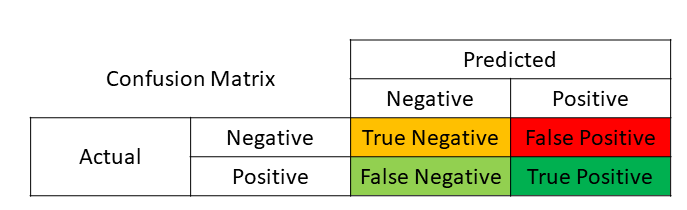

**OVERSAMPLING**

In [63]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, random_state=1)
smote_over_sampling = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote_over_sampling.fit_resample(x_train, y_train)

print(x_train_resampled, y_train_resampled)
gbc.fit(x_train_resampled, y_train_resampled)
g_over_pred=gbc.predict(x_test)

[[ 1.07202088  0.00307855  0.47370152 ...  0.          0.
   1.        ]
 [-0.29407207 -0.01773352  0.5011594  ...  0.          0.
   0.        ]
 [-0.25559057 -0.1116069   0.34721115 ...  0.          1.
   0.        ]
 ...
 [ 0.26702606  0.01483799  0.49458345 ...  0.          0.
   0.        ]
 [ 0.94368795  2.06981222  0.51041976 ...  0.          0.
   0.        ]
 [ 0.79239483  0.08910189  0.51976153 ...  0.          0.64757364
   0.        ]] [0 0 0 ... 1 1 1]


In [64]:
accuracy_score(y_test,g_over_pred), precision_score(y_test,g_over_pred),recall_score(y_test,g_over_pred),f1_score(y_test,g_over_pred)

(0.9658119658119658,
 0.7368421052631579,
 0.8235294117647058,
 0.7777777777777778)

In [65]:
confusion_matrix(y_test,g_over_pred)

array([[212,   5],
       [  3,  14]])

In [66]:
algo_test(x,y)

,Accuracy,Precision,Recall,F1
RandomForest,1.000000,1.000000,1.000000,1.000000
DesicionTree,1.000000,1.000000,1.000000,1.000000
GradientBoosting,0.980308,1.000000,0.783019,0.878307
BernoulliNB,0.954623,1.000000,0.500000,0.666667
Logistic,0.951199,0.980392,0.471698,0.636943
K Nearest,0.923801,0.904762,0.179245,0.299213
GaussianNB,0.349315,0.122402,1.000000,0.218107


### **DEEP LEARNING**

In [67]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [68]:
model=Sequential()
model.add(Dense(12,activation="relu")) 
model.add(Dense(8,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [69]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [70]:
model.fit(x,y,epochs=150,batch_size=10,verbose=1) 

Epoch 1/150
117/117 [==============================] - 1s 1ms/step - loss: 0.6036 - accuracy: 0.8889
Epoch 2/150
117/117 [==============================] - 0s 2ms/step - loss: 0.2644 - accuracy: 0.9142
Epoch 3/150
117/117 [==============================] - 0s 1ms/step - loss: 0.2247 - accuracy: 0.9207
Epoch 4/150
117/117 [==============================] - 0s 2ms/step - loss: 0.2128 - accuracy: 0.9084
Epoch 5/150
117/117 [==============================] - 0s 2ms/step - loss: 0.1731 - accuracy: 0.9282
Epoch 6/150
117/117 [==============================] - 0s 2ms/step - loss: 0.1248 - accuracy: 0.9679
Epoch 7/150
117/117 [==============================] - 0s 2ms/step - loss: 0.1100 - accuracy: 0.9746
Epoch 8/150
117/117 [==============================] - 0s 2ms/step - loss: 0.1054 - accuracy: 0.9656
Epoch 9/150
117/117 [==============================] - 0s 2ms/step - loss: 0.0738 - accuracy: 0.9761
Epoch 10/150
117/117 [==============================] - 0s 1ms/step - loss: 0.0578 - accura

In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                3888      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 4,177
Trainable params: 4,177
Non-trainable params: 0
______________________________________________________

In [72]:
scores=model.evaluate(x,y)

37/37 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 0.9991


In [73]:
print("%s:%.2r%%" % (model.metrics_names[1],scores[1]*100))

accuracy:99%
